## A1b : Performance Analysis and Salary Correlation in IPL players
                                        Gauri Vinod Nair
                                        V01110160

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st

In [4]:
ipl_bbb = pd.read_csv('IPL_ball_by_ball_updated till 2024.csv',low_memory=False)

In [5]:
ipl_salary = pd.read_excel('IPL SALARIES 2024.xlsx')

In [6]:
ipl_salary.head()

,Player,Salary,Rs,international,iconic
0,Abhishek Porel,20 lakh,20,0,NaN
1,Anrich Nortje,6.5 crore,650,1,NaN
2,Axar Patel,9 crore,900,0,NaN
3,David Warner,6.25 crore,625,1,NaN
4,Ishant Sharma,50 lakh,50,0,NaN


In [25]:
grouped_data = ipl_bbb.groupby(['Season', 'Innings No', 'Striker','Bowler']).agg({'runs_scored': sum, 'wicket_confirmation':sum}).reset_index()
grouped_data

,Season,Innings No,Striker,Bowler,runs_scored,wicket_confirmation
0,2007/08,1,A Chopra,DP Vijaykumar,1,0
1,2007/08,1,A Chopra,DW Steyn,1,1
2,2007/08,1,A Chopra,GD McGrath,2,0
3,2007/08,1,A Chopra,PJ Sangwan,6,1
4,2007/08,1,A Chopra,RP Singh,9,0
...,...,...,...,...,...,...
48781,2024,2,YBK Jaiswal,RJW Topley,0,1
48782,2024,2,YBK Jaiswal,SM Curran,6,0
48783,2024,2,YBK Jaiswal,Tilak Varma,5,0
48784,2024,2,YBK Jaiswal,VG Arora,10,1


In [8]:
# Group and aggregate data
player_runs = grouped_data.groupby(['Season', 'Striker'])['runs_scored'].sum().reset_index()
player_wickets = grouped_data.groupby(['Season', 'Bowler'])['wicket_confirmation'].sum().reset_index()


In [26]:
player_runs

,Season,Striker,runs_scored
0,2007/08,A Chopra,42
1,2007/08,A Kumble,13
2,2007/08,A Mishra,37
3,2007/08,A Mukund,0
4,2007/08,A Nehra,3
...,...,...,...
2593,2024,Vijaykumar Vyshak,1
2594,2024,WG Jacks,176
2595,2024,WP Saha,135
2596,2024,Washington Sundar,0


In [27]:
player_wickets

,Season,Bowler,wicket_confirmation
0,2007/08,A Kumble,8
1,2007/08,A Mishra,11
2,2007/08,A Nehra,14
3,2007/08,A Nel,1
4,2007/08,A Symonds,0
...,...,...,...
1924,2024,WG Jacks,2
1925,2024,Washington Sundar,1
1926,2024,YS Chahal,14
1927,2024,Yash Dayal,8


In [9]:
player_runs[player_runs['Season']=='2023'].sort_values(by='runs_scored',ascending=False)


,Season,Striker,runs_scored
2423,2023,Shubman Gill,890
2313,2023,F du Plessis,730
2311,2023,DP Conway,672
2433,2023,V Kohli,639
2443,2023,YBK Jaiswal,625
...,...,...,...
2404,2023,RP Meredith,0
2372,2023,Mohsin Khan,0
2307,2023,DG Nalkande,0
2429,2023,TU Deshpande,0


In [30]:
# Get top performers
top_run_getters = player_runs.groupby('Season').apply(lambda x: x.nlargest(3, 'runs_scored')).reset_index(drop=True)
bottom_wicket_takers = player_wickets.groupby('Season').apply(lambda x: x.nlargest(3, 'wicket_confirmation')).reset_index(drop=True)
print("Top Three Run Getters:")
print(top_run_getters)
print("\n ------------------------------------------------------------------ ")
print("\nTop Three Wicket Takers:")
print(bottom_wicket_takers)

Top Three Run Getters:
     Season          Striker  runs_scored
0   2007/08         SE Marsh          616
1   2007/08        G Gambhir          534
2   2007/08    ST Jayasuriya          514
3      2009        ML Hayden          572
4      2009     AC Gilchrist          495
5      2009   AB de Villiers          465
6   2009/10     SR Tendulkar          618
7   2009/10        JH Kallis          572
8   2009/10         SK Raina          528
9      2011         CH Gayle          608
10     2011          V Kohli          557
11     2011     SR Tendulkar          553
12     2012         CH Gayle          733
13     2012        G Gambhir          590
14     2012         S Dhawan          569
15     2013       MEK Hussey          733
16     2013         CH Gayle          720
17     2013          V Kohli          639
18     2014       RV Uthappa          660
19     2014         DR Smith          566
20     2014       GJ Maxwell          552
21     2015        DA Warner          562
22     2015

In [11]:
# Extract year from the date and create a new dataframe with match id and year

ipl_year_id = pd.DataFrame(columns=["id", "year"])
ipl_year_id["id"] = ipl_bbb["Match id"]
ipl_year_id["year"] = pd.to_datetime(ipl_bbb["Date"], dayfirst=True).dt.year


In [12]:
#create a copy of ipl_bbbc dataframe
ipl_bbbc= ipl_bbb.copy()

In [13]:
ipl_bbbc['year'] = pd.to_datetime(ipl_bbb["Date"], dayfirst=True).dt.year


In [14]:
ipl_bbbc[["Match id", "year", "runs_scored","wicket_confirmation","Bowler",'Striker']].head()


,Match id,year,runs_scored,wicket_confirmation,Bowler,Striker
0,335982,2008,0,0,P Kumar,SC Ganguly
1,335982,2008,0,0,P Kumar,BB McCullum
2,335982,2008,0,0,P Kumar,BB McCullum
3,335982,2008,0,0,P Kumar,BB McCullum
4,335982,2008,0,0,P Kumar,BB McCullum


In [15]:
import scipy.stats as st

def get_best_distribution(data):
    dist_names = ['alpha','beta','betaprime','burr12','crystalball',
                  'dgamma','dweibull','erlang','exponnorm','f','fatiguelife',
                  'gamma','gengamma','gumbel_l','johnsonsb','kappa4',
                  'lognorm','nct','norm','norminvgauss','powernorm','rice',
                  'recipinvgauss','t','trapz','truncnorm']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))
    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value
    print("\nBest fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))
    return best_dist, best_p, params[best_dist]

In [16]:
total_run_each_year = ipl_bbbc.groupby(["year", "Striker"])["runs_scored"].sum().reset_index()


In [17]:
total_run_each_year.sort_values(["year", "runs_scored"], ascending=False, inplace=True)
print(total_run_each_year)
 

      year          Striker  runs_scored
2549  2024       RD Gaikwad          509
2589  2024          V Kohli          500
2470  2024  B Sai Sudharsan          418
2502  2024         KL Rahul          406
2555  2024          RR Pant          398
...    ...              ...          ...
58    2008         L Balaji            0
66    2008   M Muralitharan            0
75    2008         MM Patel            0
107   2008      S Sreesanth            0
136   2008           U Kaul            0

[2598 rows x 3 columns]


In [18]:
list_top_batsman_last_three_year = {}
for i in total_run_each_year["year"].unique()[:3]:
    list_top_batsman_last_three_year[i] = total_run_each_year[total_run_each_year.year == i][:3]["Striker"].unique().tolist()

In [19]:
list_top_batsman_last_three_year

{2024: ['RD Gaikwad', 'V Kohli', 'B Sai Sudharsan'],
 2023: ['Shubman Gill', 'F du Plessis', 'DP Conway'],
 2022: ['JC Buttler', 'KL Rahul', 'Q de Kock']}

In [20]:
import warnings
warnings.filterwarnings('ignore')
runs = ipl_bbbc.groupby(['Striker','Match id'])[['runs_scored']].sum().reset_index()

for key in list_top_batsman_last_three_year:
    for Striker in list_top_batsman_last_three_year[key]:
        print("************************")
        print("year:", key, " Batsman:", Striker)
        get_best_distribution(runs[runs["Striker"] == Striker]["runs_scored"])
        print("\n\n")

************************
year: 2024  Batsman: RD Gaikwad
p value for alpha = 2.599259711013304e-20
p value for beta = 0.02041902689492492
p value for betaprime = 0.0195037635986679
p value for burr12 = 0.46882020698395865
p value for crystalball = 0.24953646987270617
p value for dgamma = 0.1570743843120962
p value for dweibull = 0.20046582403736823
p value for erlang = 1.893799588395604e-06
p value for exponnorm = 0.4644304230917985
p value for f = 1.3560920695663998e-07
p value for fatiguelife = 1.304427037367869e-14
p value for gamma = 0.005830868576003456
p value for gengamma = 0.015331622187827243
p value for gumbel_l = 0.05546236480086464
p value for johnsonsb = 4.646964117947127e-13
p value for kappa4 = 0.006363220770325362
p value for lognorm = 1.1719355665219537e-16
p value for nct = 0.5881570496217812
p value for norm = 0.2495365180930973
p value for norminvgauss = 0.5538573365184996
p value for powernorm = 0.1788753268739085
p value for rice = 0.18287532184336575
p value for 

In [21]:
total_wicket_each_year = ipl_bbbc.groupby(["year", "Bowler"])["wicket_confirmation"].sum().reset_index()


In [22]:
total_wicket_each_year.sort_values(["year", "wicket_confirmation"], ascending=False, inplace=True)
print(total_wicket_each_year)
 

      year             Bowler  wicket_confirmation
1836  2024           HV Patel                   19
1875  2024       Mukesh Kumar                   15
1822  2024     Arshdeep Singh                   14
1842  2024          JJ Bumrah                   14
1876  2024  Mustafizur Rahman                   14
...    ...                ...                  ...
16    2008           CL White                    0
41    2008             K Goel                    0
43    2008          LPC Silva                    0
60    2008       Pankaj Singh                    0
90    2008        VS Yeligati                    0

[1929 rows x 3 columns]


In [23]:
list_top_bowler_last_three_year = {}
for i in total_wicket_each_year["year"].unique()[:3]:
    list_top_bowler_last_three_year[i] = total_wicket_each_year[total_wicket_each_year.year == i][:3]["Bowler"].unique().tolist()
list_top_bowler_last_three_year

{2024: ['HV Patel', 'Mukesh Kumar', 'Arshdeep Singh'],
 2023: ['MM Sharma', 'Mohammed Shami', 'Rashid Khan'],
 2022: ['YS Chahal', 'PWH de Silva', 'K Rabada']}

In [24]:
import warnings
warnings.filterwarnings('ignore')
wickets = ipl_bbbc.groupby(['Bowler','Match id'])[['wicket_confirmation']].sum().reset_index()

for key in list_top_bowler_last_three_year:
    for bowler in list_top_bowler_last_three_year[key]:
        print("************************")
        print("year:", key, " Bowler:", bowler)
        get_best_distribution(wickets[wickets["Bowler"] == bowler]["wicket_confirmation"])
        print("\n\n")

************************
year: 2024  Bowler: HV Patel
p value for alpha = 0.0002993252328930706
p value for beta = 2.777571908776589e-19
p value for betaprime = 1.7052883875145053e-30
p value for burr12 = 5.427998338605459e-15
p value for crystalball = 1.1109118198587684e-05
p value for dgamma = 4.375428528574276e-05
p value for dweibull = 1.8553295107771936e-05
p value for erlang = 5.473635282991912e-24
p value for exponnorm = 0.0002813279943461815
p value for f = 1.9012983291282487e-09
p value for fatiguelife = 1.9734428958773156e-05
p value for gamma = 1.470787431589663e-16
p value for gengamma = 1.4345058849022962e-16
p value for gumbel_l = 4.541523588271283e-05
p value for johnsonsb = 2.827201329331457e-51
p value for kappa4 = 9.177530010006471e-23
p value for lognorm = 5.2162358572043325e-22
p value for nct = 0.0001960277304576293
p value for norm = 1.1109124960635979e-05
p value for norminvgauss = 3.811196478020768e-05
p value for powernorm = 3.2186417463058256e-05
p value for r

Fitting

In [32]:
R2024 =total_run_each_year[total_run_each_year['year']==2024]

In [33]:
pip install fuzzywuzzy


  Obtaining dependency information for fuzzywuzzy from https://files.pythonhosted.org/packages/43/ff/74f23998ad2f93b945c0309f825be92e04e0348e062026998b5eefef4c33/fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata


In [34]:
from fuzzywuzzy import process

# Convert to DataFrame
df_salary = ipl_salary.copy()
df_runs = R2024.copy()

# Function to match names
def match_names(name, names_list):
    match, score = process.extractOne(name, names_list)
    return match if score >= 80 else None  # Use a threshold score of 80

# Create a new column in df_salary with matched names from df_runs
df_salary['Matched_Player'] = df_salary['Player'].apply(lambda x: match_names(x, df_runs['Striker'].tolist()))

# Merge the DataFrames on the matched names
df_merged = pd.merge(df_salary, df_runs, left_on='Matched_Player', right_on='Striker')

In [35]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          111 non-null    object 
 1   Salary          111 non-null    object 
 2   Rs              111 non-null    int64  
 3   international   111 non-null    int64  
 4   iconic          0 non-null      float64
 5   Matched_Player  111 non-null    object 
 6   year            111 non-null    int32  
 7   Striker         111 non-null    object 
 8   runs_scored     111 non-null    int64  
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 7.5+ KB


In [36]:
# Calculate the correlation
correlation = df_merged['Rs'].corr(df_merged['runs_scored'])

print("Correlation between Salary and Runs:", correlation)

Correlation between Salary and Runs: 0.30612483765821674


In [6]:
# Convert Salary to numeric (handle 'lakh' and 'crore')
def convert_salary(salary_str):
    if 'lakh' in salary_str:
        return float(salary_str.replace(' lakh', '')) * 1e5
    elif 'crore' in salary_str:
        return float(salary_str.replace(' crore', '')) * 1e7
    else:
        return float(salary_str)

ipl_salary['Salary'] = ipl_salary['Salary'].apply(convert_salary)

ValueError: could not convert string to float: '50s'

In [8]:
# Merge performance data with salary data
performance_salary = pd.merge(ipl_bbb, ipl_salary, left_on='Striker', right_on='Player', how='left')

In [9]:
# Filter data for AM Rahane
amr_data = performance_salary[performance_salary['Striker'] == 'AM Rahane']


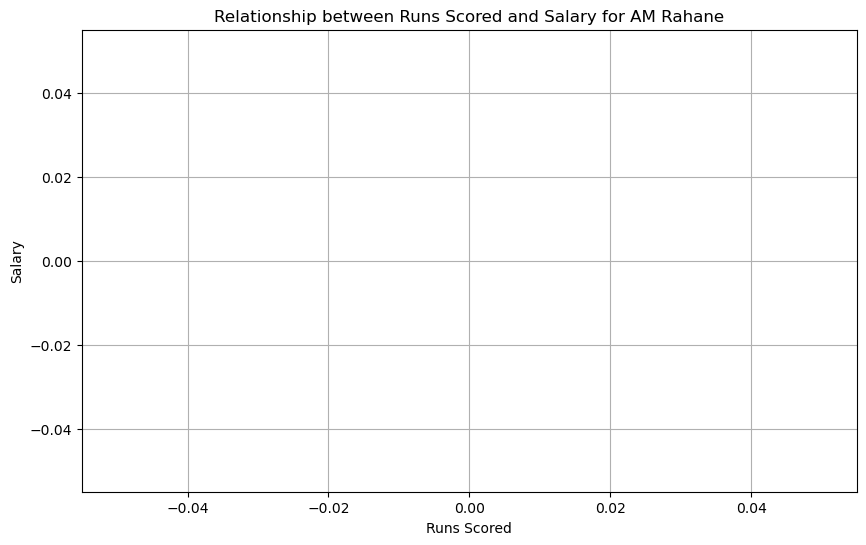

In [10]:
# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=amr_data, x='runs_scored', y='Salary')
plt.title('Relationship between Runs Scored and Salary for AM Rahane')
plt.xlabel('Runs Scored')
plt.ylabel('Salary')
plt.grid(True)

In [11]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(amr_data['runs_scored'], amr_data['Salary'])
line = slope * amr_data['runs_scored'] + intercept
plt.plot(amr_data['runs_scored'], line, color='red')

NameError: name 'linregress' is not defined

In [12]:
# Display correlation coefficient
correlation_coef = np.corrcoef(amr_data['runs_scored'], amr_data['Salary'])[0, 1]
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation_coef:.2f}', transform=plt.gca().transAxes)

plt.show()

AttributeError: 'float' object has no attribute 'shape'